<div align="center">

# ***Mushroom classifier: Poisson | Edible***

> Dataset: [UCI Mushroom](https://archive.ics.uci.edu/dataset/73/mushroom)
---
---

</div>

In [13]:
#----------- libratory -----------#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as display
from IPython.display import Image, HTML, Markdown

from sklearn.preprocessing import LabelEncoder

import sys
from pathlib import Path

#--- custom modules:
sys.path.append(str(Path.cwd().parent.parent))
from utils import path

# mushroom-cap-shape.jpg                mushroom-gill-spacing.jpg             mushroom-stalk-768x259.jpg
# mushroom-cap-surface-768x138.jpg      mushroom-gill-tissue-arrangement.jpg  mushroom-structure.jpg
# mushroom-gill-attachment-768x146.jpg  mushroom-ring-type-768x207.jpg



---


# **1. Overview about mushroom structure**

## 1.1 Mushroom structure 

<figure style="text-align:center">
    <img src="../../assets/images/mushroom/mushroom-structure.jpg" width="800">
    <figcaption><b>Figure 1.1</b> Mushroom Structure</figcaption>
</figure>

- Subscribe:
    + *pileus*: cap of the mushroom
    + *gills*: thin, papery structures located on the underside of the pileus
    + *stipe*: stalk that supports the pileus
    + *annulus*: ring-like structure on the stipe
    + *volva*: cup-like structure at the base of the stipe

## 1.2 Mushroom cap shape

<figure style="text-align:center">
    <img src="../../assets/images/mushroom/mushroom-cap-shape.jpg" width="800px">
    <figcaption><b>Figure 1.2</b> Mushroom Cap Shape</figcaption>
</figure>

- Subscribe:
    + *bell*: bell-shaped cap 
    + *conical*: cone-shaped cap
    + *convex*: rounded cap
    + *flat*: flat cap
    + *knobbed*: cap with a central knob
    + *sunken*: cap with a depressed center

## 1.3 Mushroom cap surface

<figure style="text-align:center">
    <img src="../../assets/images/mushroom/mushroom-cap-surface-768x138.jpg" width="800px">
    <figcaption><b>Figure 1.3</b> Mushroom Cap Surface</figcaption>
</figure>

- Subscribe:
    + *smooth*: cap surface that is smooth and even
    + *velvety*: cap surface with a soft, velvety texture
    + *fibrous*: cap surface with a fibrous texture
    + *scaly*: cap surface covered with scales
    + *patches*: cap surface with irregular patches or spots

## 1.4 Mushroom gill attachment

<figure style="text-align:center">
    <img src="../../assets/images/mushroom/mushroom-gill-attachment-768x146.jpg" width="800px">
    <figcaption><b>Figure 1.4</b> Mushroom Gill Attachment</figcaption>
</figure>

## 1.5 Mushroom gill spacing

<figure style="text-align:center">
    <img src="../../assets/images/mushroom/mushroom-gill-spacing.jpg" width="800px">
    <figcaption><b>Figure 1.5</b> Mushroom Gill Spacing</figcaption>
</figure>

## 1.6 Mushroom gill tissue arrangement

<figure style="text-align:center">
    <img src="../../assets/images/mushroom/mushroom-gill-tissue-arrangement.jpg" width="800px">
    <figcaption><b>Figure 1.6</b> Mushroom Gill Tissue Arrangement</figcaption>
</figure>

## 1.7 Mushroom stalk root type

<figure style="text-align:center">
    <img src="../../assets/images/mushroom/mushroom-stalk-768x259.jpg" width="800px">
    <figcaption><b>Figure 1.7</b> Mushroom Stalk Root Type</figcaption>
</figure>

- Subscribe:
    + *equl*: stalk that is uniform in thickness from top to bottom
    + *club*: (chùy) stalk that is thicker at the base than at the top
    + *bulbous*: (củ) stalk that is swollen or bulb-like at the base
    + *rooting*: (rễ cái) stalk that tapers down into the ground like a root
    + *with rhzoids*: stalk with a lot of small root

## 1.8 Mushroom ring type

<figure style="text-align:center">
    <img src="../../assets/images/mushroom/mushroom-ring-type-768x207.jpg" width="800px">
    <figcaption><b>Figure 1.8</b> Mushroom Ring Type</figcaption>
</figure>

---

In [14]:
# Load the dataset
path_dataset = path.get_data_path() / "mushrooms.csv"
print(f"Loading dataset from: {path_dataset}")

try:
    df_mushroom = pd.read_csv(path_dataset)
    print("[^-^] Dataset loaded successfully.")
except Exception as e:
    print(f"[-_-] Error loading dataset: {e}")

Loading dataset from: /home/nii/Documents/SGU_2025_ML-Fundamentals/datasets/mushrooms.csv
[^-^] Dataset loaded successfully.


# **2. Exploratory Data Analysis (EDA)**

## 2.1 Describe Statistics

    - Peek At Our Data
    - Dimensions of Our Data.
    - Data Types.
    - Class Distribution.
    - Data Summary.
    - Correlations.
    - Skewness.

In [15]:
df_mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [16]:
# df_mushroom.describe(include='all')
df_mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [17]:
df_mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [18]:
# Check for missing values
df_mushroom.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

- Comment: 
    + All features are string data type (categorical data).
    + There are no missing values in the dataset.
    + Number of samples: 8124
    + Number of features: 22 (including target feature)

    &rarr; A middle size, can split into train and test sets with ratio 80:20

## 2.2 Visualize data

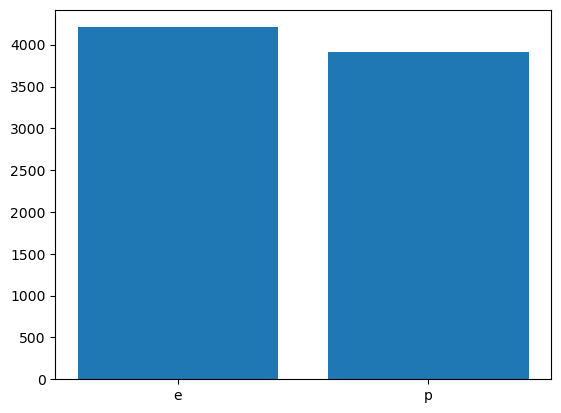

In [19]:
class_count = df_mushroom['class'].value_counts()

plt.bar(x=class_count.keys(), height=class_count.values);

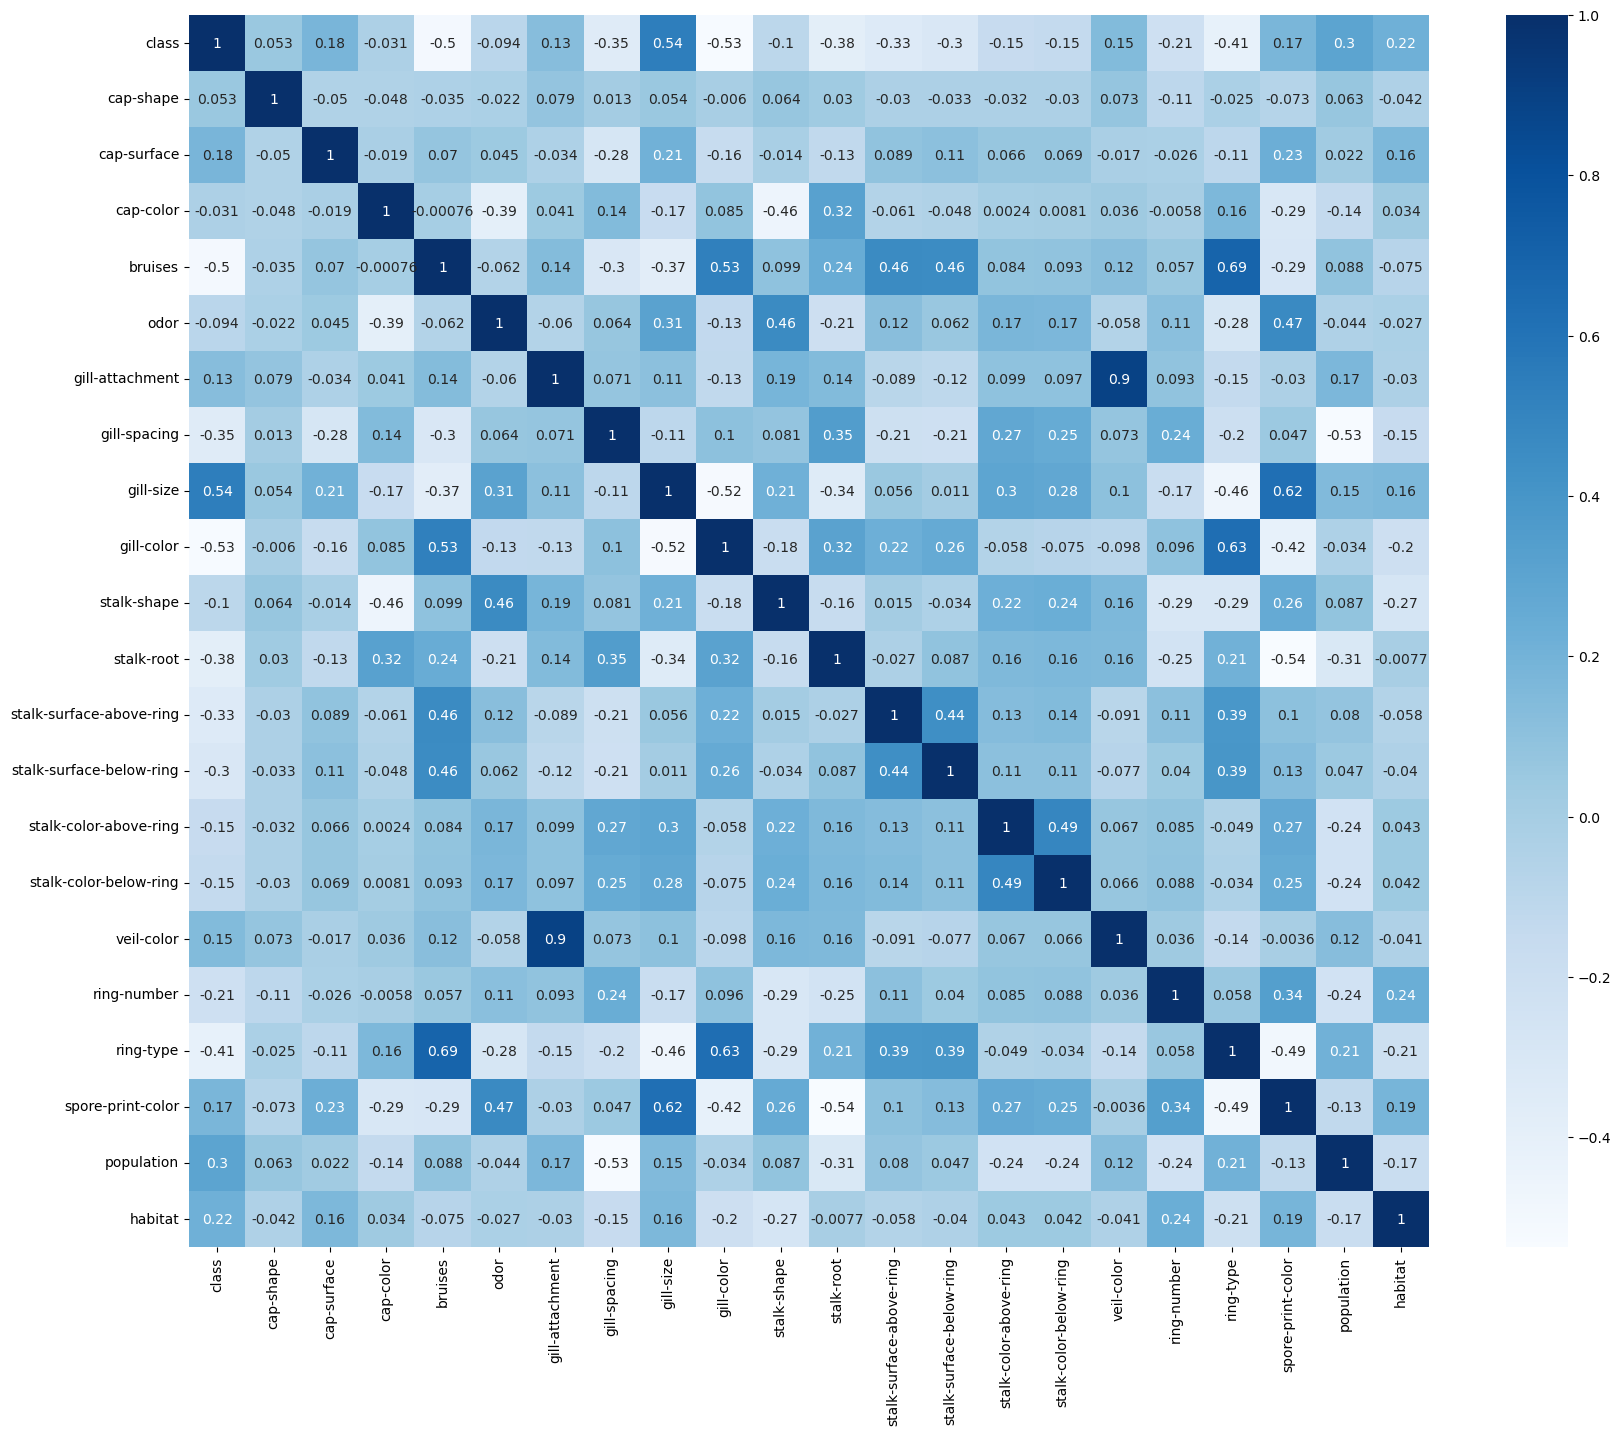

In [20]:
#--- Get the correlation of features
df_eda = df_mushroom.copy()
df_eda.drop(columns='veil-type', inplace=True)
# Because all feature are string, so we have convert it to numeric (Ordinal)
label_encoder = LabelEncoder()
df_encoded = df_eda.apply(label_encoder.fit_transform)

corr = df_encoded.corr(numeric_only=True)
# display.display(corr)

# Visualize with heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

## Build model Naive Bayes

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [22]:
df_mushroom.head()
df = df_mushroom.copy()

### Encode to number

In [23]:
labelencoder = LabelEncoder()
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])


### Split train/test

In [24]:
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)   # stratify=y giúp giữ tỷ lệ giữa nấm độc / nấm ăn được đồng đều ở train/test.


### Model

In [25]:
model = CategoricalNB()
model.fit(X_train, y_train)


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None
,min_categories,None


### Predict and evaluate

In [ ]:
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Báo cáo chi tiết
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9495488105004102

Confusion Matrix:
 [[1254    9]
 [ 114 1061]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      1263
           1       0.99      0.90      0.95      1175

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



# Reference:

[[1] Data science Mushroom classification Part1](https://notebooklm.google.com/notebook/2862ae3a-498f-4bcb-b3ff-93037fa7132a)

# The end
